# Problem Statement

## Business Scenario

A diamond merchant has come to you for help. They want to create an automated system to predict the apt price of a diamond based on its shape/size/color etc.
They have shared the shape/size/color data of 53940 diamonds.
Your task is to create a machine learning model which can predict the price of a diamond based on its characteristics.

### About Dataset

* **carat:** Weight(0.2 to 5.01) of the diamond
* **cut:** Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color:** Diamond colour from J(worst) to D(best)
* **clarity:** Measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x:** Length(0 to 10.74) in mm 
* **y:** Width(0 to 58.9) in mm 
* **z:** Depth(0 to 31.8) in mm 
* **depth %:** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter. Total depth percentage(43 to 79) = z/mean(x,y) = 2\*z/(x+y)
* **table:** Width(43 to 95) of the top of diamond relative to widest point 
* **price:** Price in US dollar

### Defining the problem statement:
Create a ML model which can predict the price of a diamond
Target Variable: price
Predictors: color, cut, carat ,clarity,x ,y ,z ,depth and table.

### Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

<AxesSubplot:>

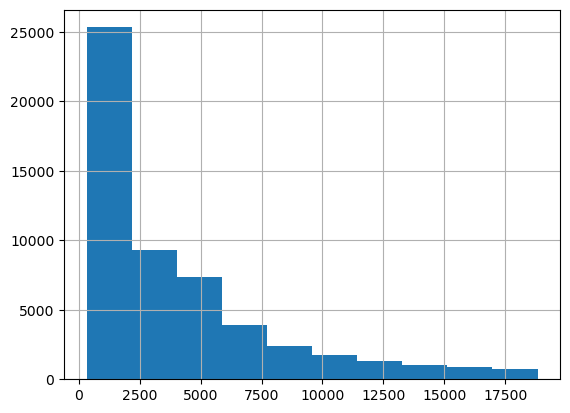

In [311]:
df['price'].hist()

# Importing Libraries

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFE
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


# Reading a Data Set

In [313]:
df=pd.read_csv('DiamondsPrices.csv')

# Understanding the Dataset

In [314]:
#checking the rows of a dataset
print('Dataset shape: ',df.shape)

Dataset shape:  (53940, 10)


In [315]:
# Printing top 5 rows of a dataset
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [316]:
#printing bottom rows of a dataset
df.tail()


,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


##### Checking Null values

In [317]:
#Checking if there any null values in my dataset?
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Checking Outliers 

In [318]:
#checking for outliers in  columns
Q3=df.quantile(0.75)
Q1=df.quantile(0.25)
IQR=Q3-Q1
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print('Shape after dropping Dataset',df.shape)
print('dropped Rows :' ,53940-47524)

Shape after dropping Dataset (47524, 10)
dropped Rows : 6416


#### Checking Kurtosis 

In [319]:
df.kurtosis()

carat   -0.440258
depth    0.014946
table   -0.178982
price    0.645926
x       -1.118259
y       -1.126954
z       -1.124260
dtype: float64

#### Checking skewness

In [320]:
#checking if I have a skewed data or not?
df.skew()

carat    0.689535
depth   -0.243694
table    0.388558
price    1.201398
x        0.251800
y        0.245616
z        0.246154
dtype: float64

### Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine

<AxesSubplot:xlabel='price', ylabel='Count'>

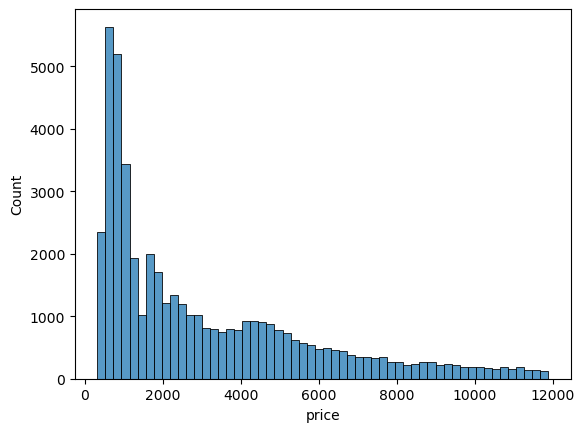

In [321]:
sns.histplot(data=df,x=df['price'])

## Inference
The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from. It is slightly positively skewed. which is acceptable.

0.24561555209553365

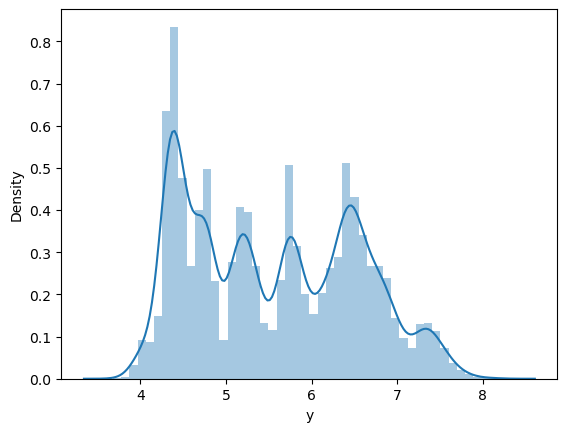

In [322]:
#distribution plot of y
sns.distplot(df['y'])
df['y'].skew()

0.24615388821109863

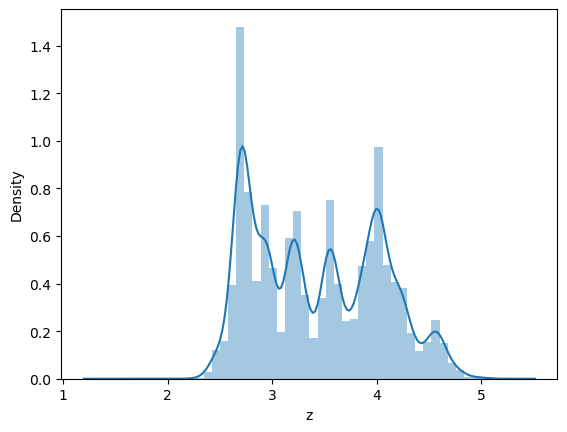

In [323]:
# Distribution plot of z
sns.distplot(df['z'])
df['z'].skew()

0.2517998473574554

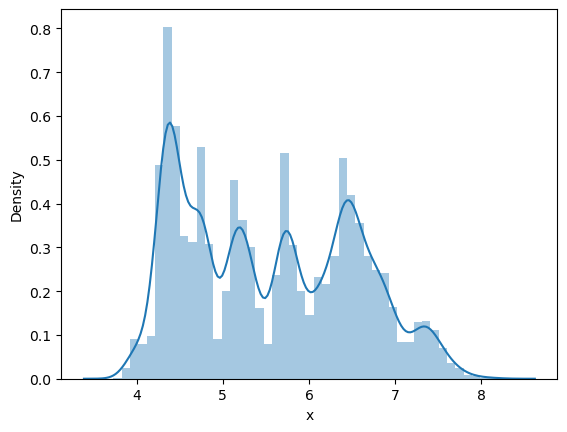

In [324]:
#distribution plot of x
sns.distplot(df['x'])
df['x'].skew()

1.2013984882174247

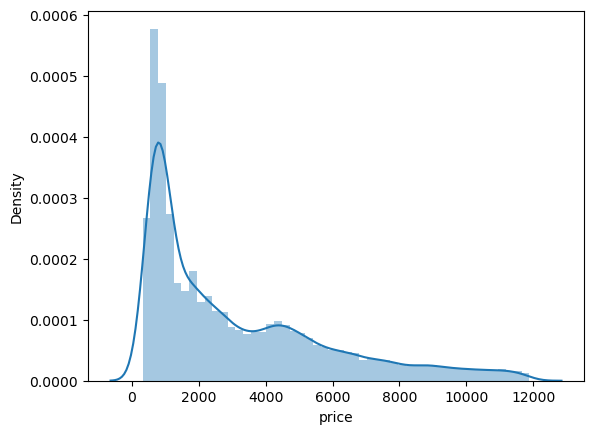

In [325]:
#Distribution plot of price
sns.distplot(df['price'])
df['price'].skew()

0.3885575308983553

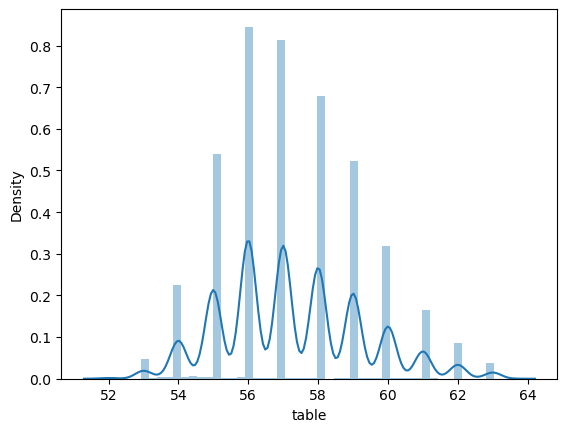

In [326]:
#Distribution plot of table
sns.distplot(df['table'])
df['table'].skew()

-0.24369381906629717

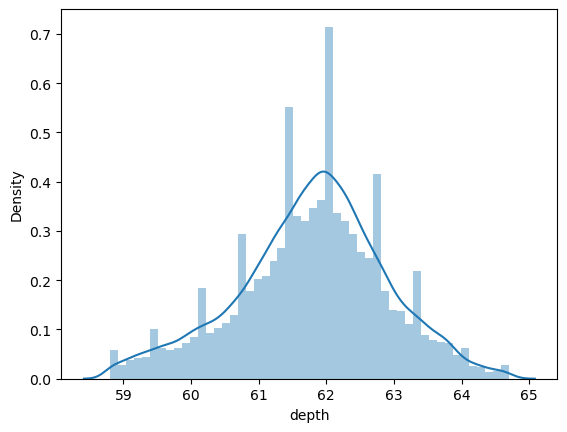

In [327]:
# Distribution plot of depth
sns.distplot(df['depth'])
df['depth'].skew()

0.6895346034916623

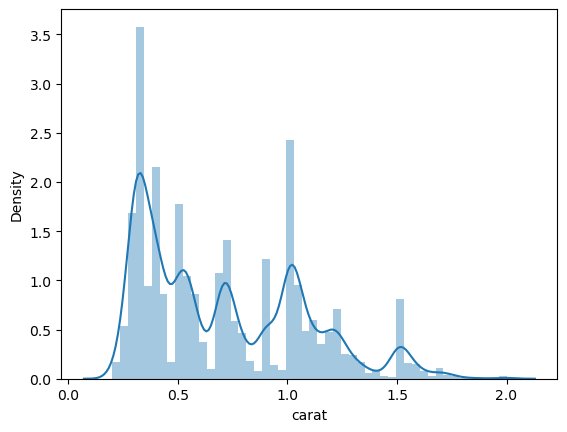

In [328]:
#Distribution plot of carat
sns.distplot(df['carat'])
df['carat'].skew()

#### Checking Duplicated values 

In [329]:
#checking if we have any duplicate values in dataset?
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
3704,1.00,Ideal,E,SI2,62.9,56.0,3450,6.32,6.30,3.97
...,...,...,...,...,...,...,...,...,...,...
47069,0.52,Ideal,D,VS2,61.8,55.0,1822,5.16,5.19,3.20
47296,0.30,Good,J,VS1,63.4,57.0,394,4.23,4.26,2.69
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17


In [331]:
#Dropping Duplicated rows
df.drop_duplicates(inplace=True)

In [332]:
#Shape of dataset after dropping duplicated rows
print('Rows in dataset after dropping duplicated rows :',47524-112)

Rows in dataset after dropping duplicated rows : 47412


In [335]:
print('shape of data frame after dropping outliers :',df.shape)

shape of data frame after dropping outliers : (47412, 10)


In [336]:
#checking the descriptive summary numerical columns
df.describe()

,carat,depth,table,price,x,y,z
count,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000
mean,0.708891,61.785926,57.261603,3111.518645,5.547276,5.552146,3.428745
std,0.370974,1.106231,2.021752,2750.147119,0.979628,0.973734,0.606007
min,0.200000,58.800000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,0.380000,61.100000,56.000000,891.000000,4.640000,4.650000,2.860000
50%,0.600000,61.900000,57.000000,2064.000000,5.440000,5.460000,3.360000
75%,1.010000,62.500000,59.000000,4637.000000,6.410000,6.410000,3.980000
max,2.000000,64.700000,63.500000,11883.000000,8.280000,8.270000,5.300000


In [337]:
#checking the descriptive summary categorical columns
df.describe(include='object')

,cut,color,clarity
count,47412,47412,47412
unique,5,7,8
top,Ideal,G,SI1
freq,20278,10056,11524


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47412 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47412 non-null  float64
 1   cut      47412 non-null  object 
 2   color    47412 non-null  object 
 3   clarity  47412 non-null  object 
 4   depth    47412 non-null  float64
 5   table    47412 non-null  float64
 6   price    47412 non-null  int64  
 7   x        47412 non-null  float64
 8   y        47412 non-null  float64
 9   z        47412 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.0+ MB


# EDA

# Univariate Analysis

In [339]:
#checking the descriptive summary numerical columns
#statistical measures of data
df.describe()

,carat,depth,table,price,x,y,z
count,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000,47412.000000
mean,0.708891,61.785926,57.261603,3111.518645,5.547276,5.552146,3.428745
std,0.370974,1.106231,2.021752,2750.147119,0.979628,0.973734,0.606007
min,0.200000,58.800000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,0.380000,61.100000,56.000000,891.000000,4.640000,4.650000,2.860000
50%,0.600000,61.900000,57.000000,2064.000000,5.440000,5.460000,3.360000
75%,1.010000,62.500000,59.000000,4637.000000,6.410000,6.410000,3.980000
max,2.000000,64.700000,63.500000,11883.000000,8.280000,8.270000,5.300000


In [340]:
#checking the descriptive summary categorical columns
#statistical measure of categorical feature
df.describe(include='object')

,cut,color,clarity
count,47412,47412,47412
unique,5,7,8
top,Ideal,G,SI1
freq,20278,10056,11524


##### For categorical columns 
we can create a barplot or count plot.
##### Categorical Predictors: 'cut', 'color', 'clarity'

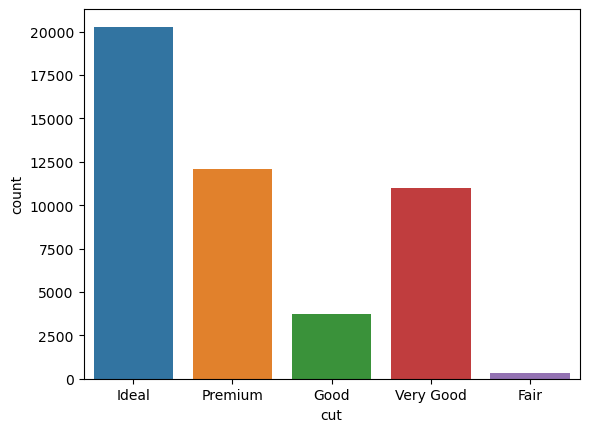

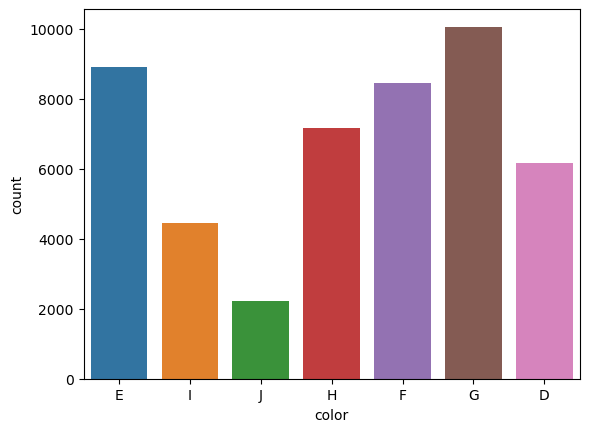

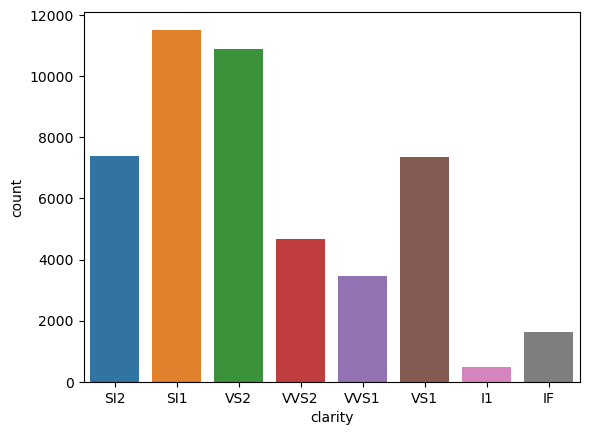

In [341]:
#countplot:
for col in df.select_dtypes(include='object'):
    sns.countplot(data=df.select_dtypes(include='object'),x=col)
    plt.show()

### Interpretation
Count plot represent the frequencies of each category in the Y-axis and the category names in the X-axis.


#### For Numerical Columns

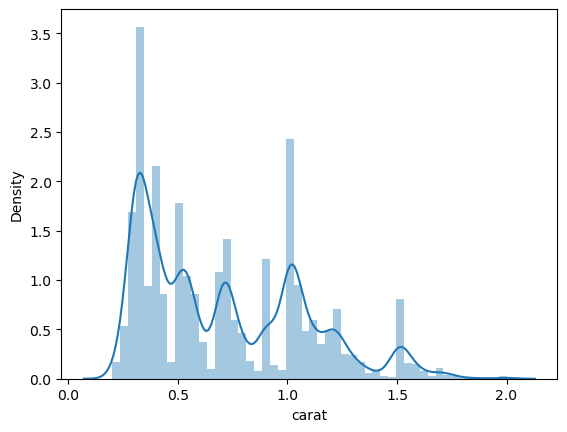

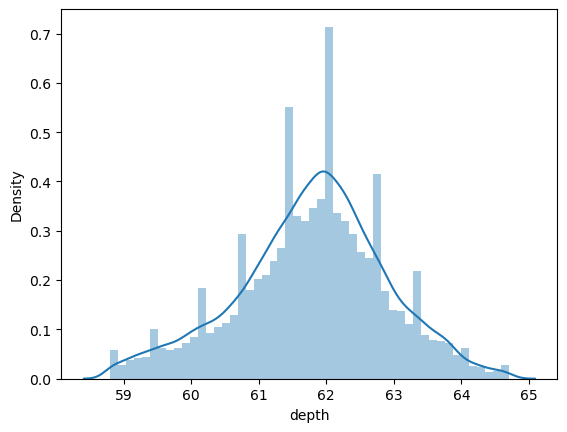

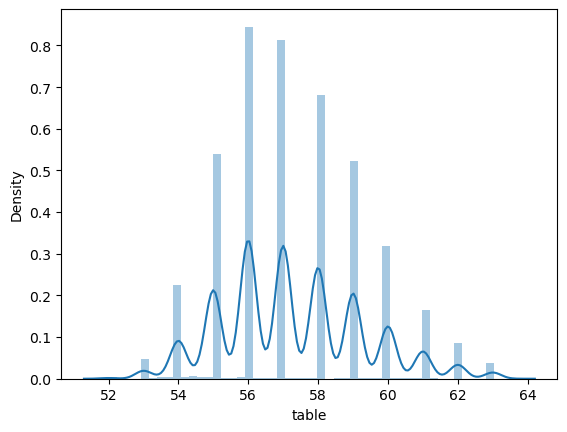

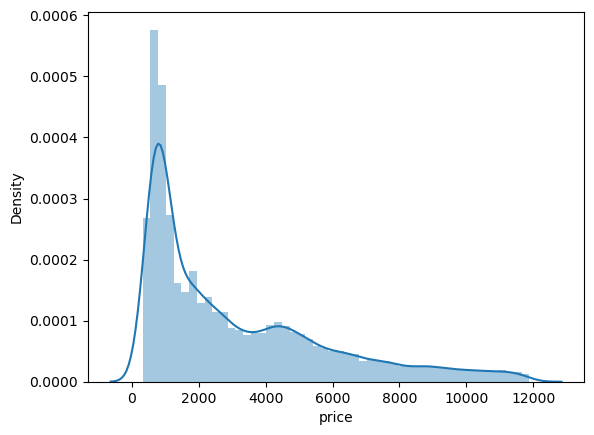

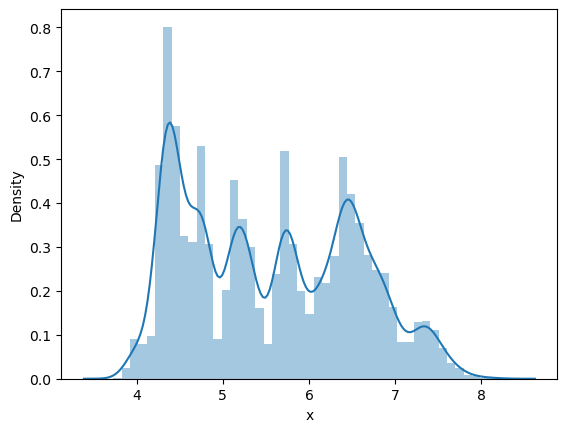

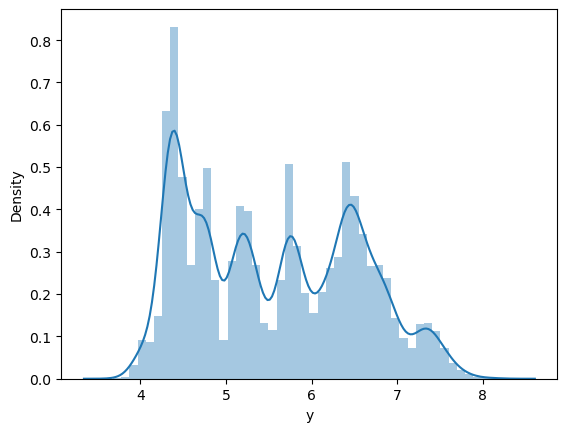

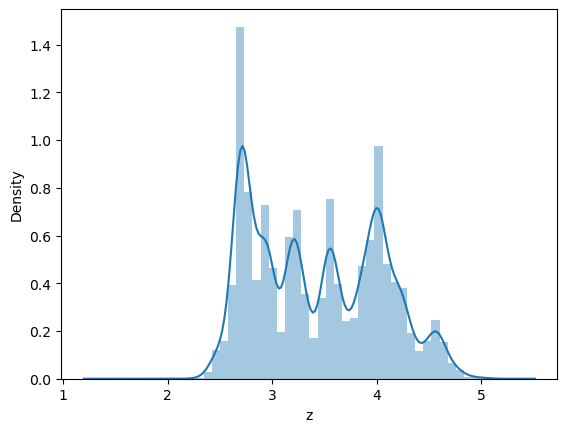

In [342]:
#Distribution plot of all continuos preedictors:
for col in df.select_dtypes(include='number'):
    sns.distplot(a=df[col])
    plt.show()

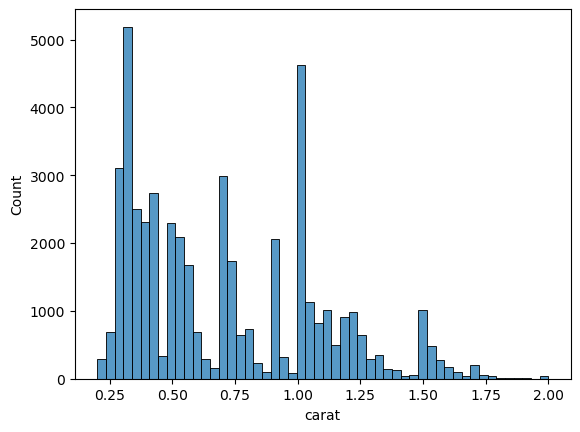

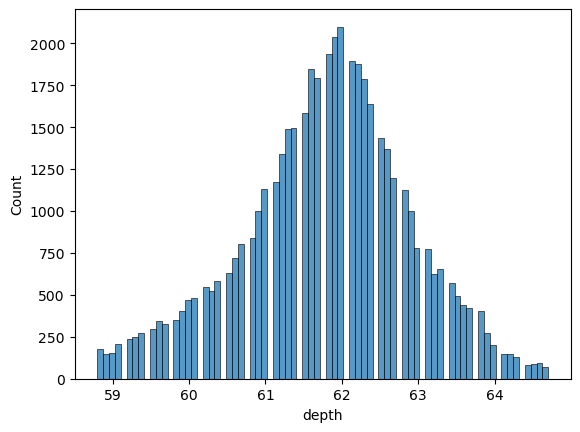

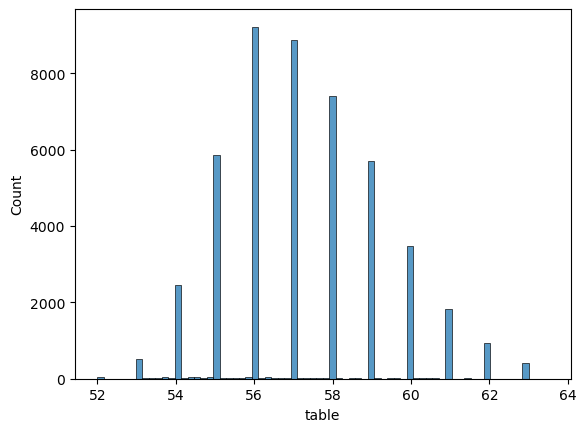

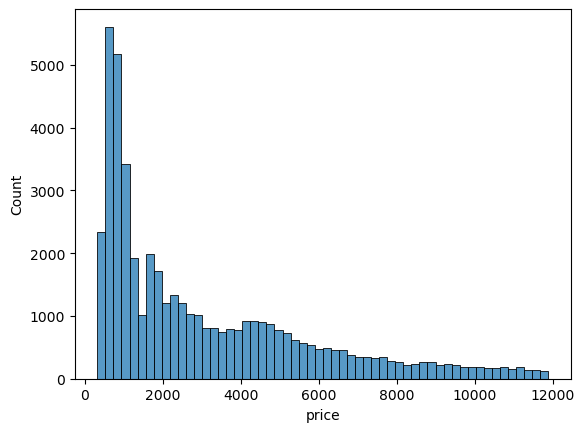

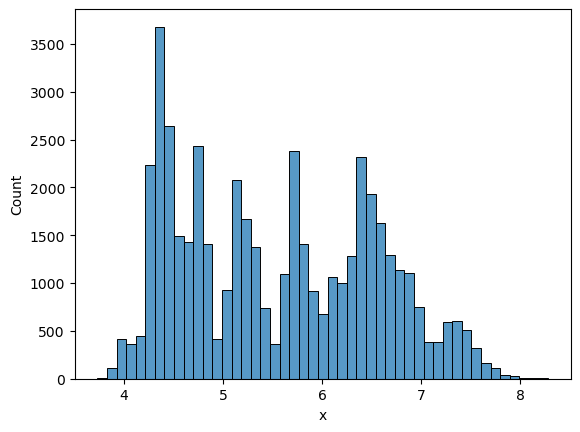

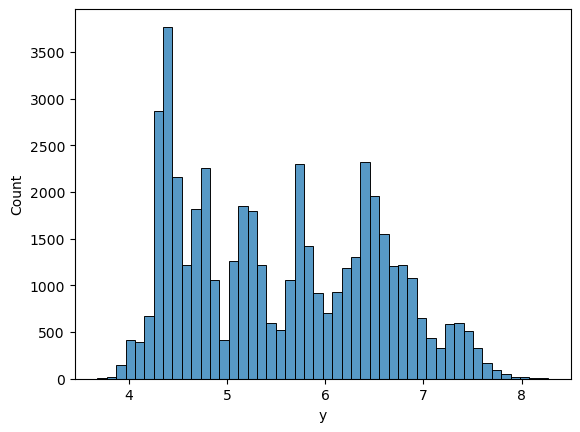

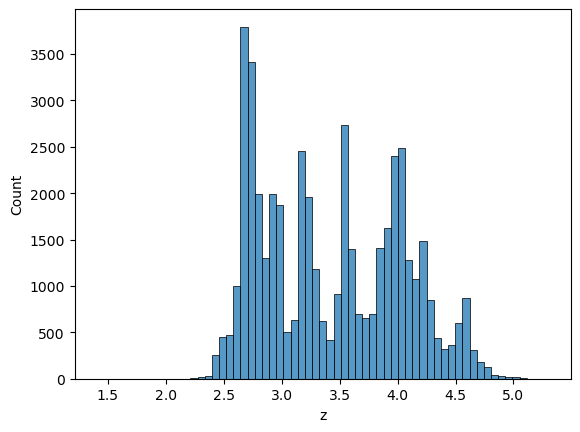

In [343]:
#Histogram
for col in df.select_dtypes(include='number'):
    sns.histplot(data=df.select_dtypes(include='number'),x=col)
    plt.show()

# Multivariate Analysis

### Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

### Checking correlation

In [344]:
# Checking the Correlation 
df_corr=df.corr()


In [345]:
df_corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.036227,0.186638,0.922932,0.986280,0.985451,0.985073
depth,0.036227,1.000000,-0.240451,0.006450,-0.010184,-0.011842,0.093079
table,0.186638,-0.240451,1.000000,0.136226,0.185722,0.180274,0.158430
price,0.922932,0.006450,0.136226,1.000000,0.899821,0.900957,0.896542
x,0.986280,-0.010184,0.185722,0.899821,1.000000,0.998532,0.993341
y,0.985451,-0.011842,0.180274,0.900957,0.998532,1.000000,0.993163
z,0.985073,0.093079,0.158430,0.896542,0.993341,0.993163,1.000000


<AxesSubplot:>

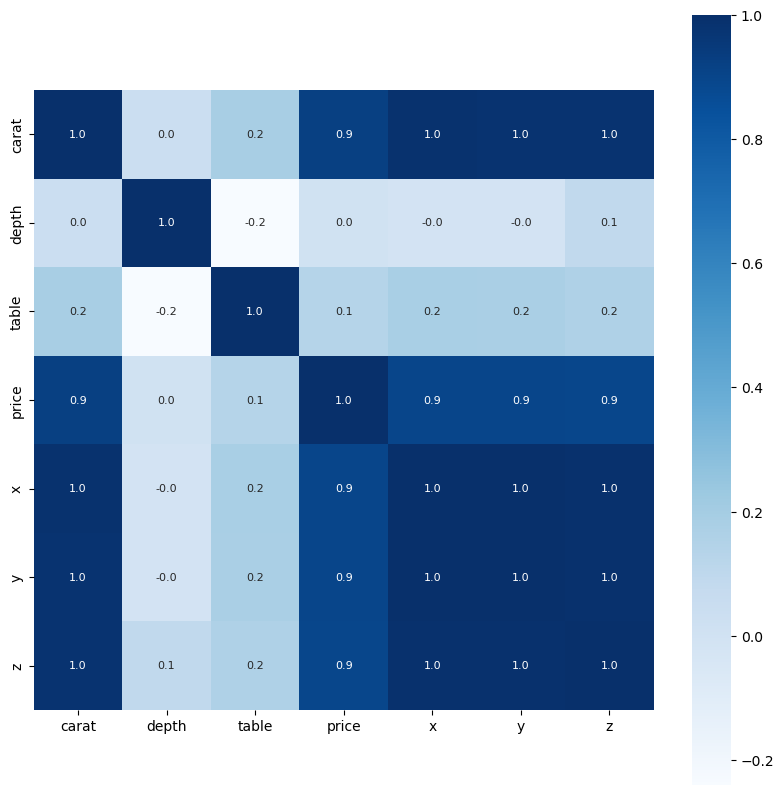

In [346]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


## Scatter Plot

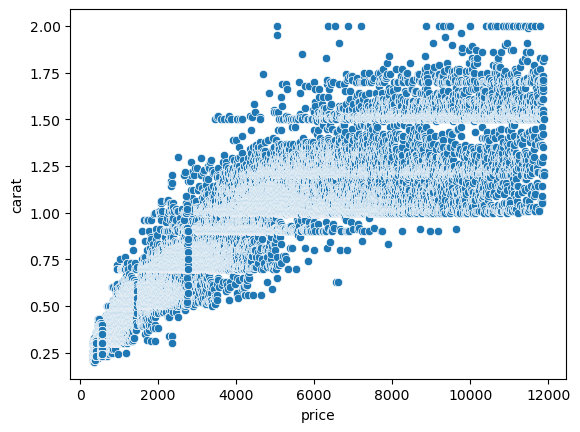

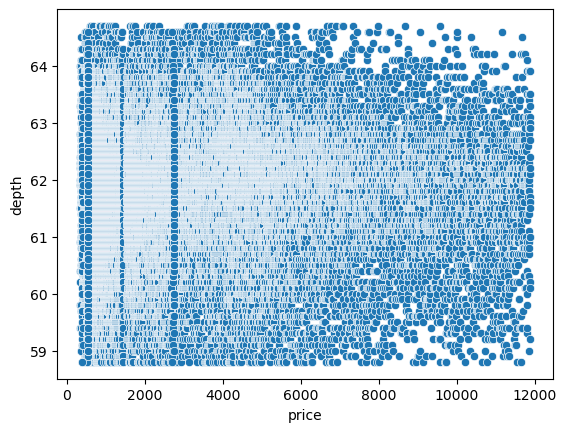

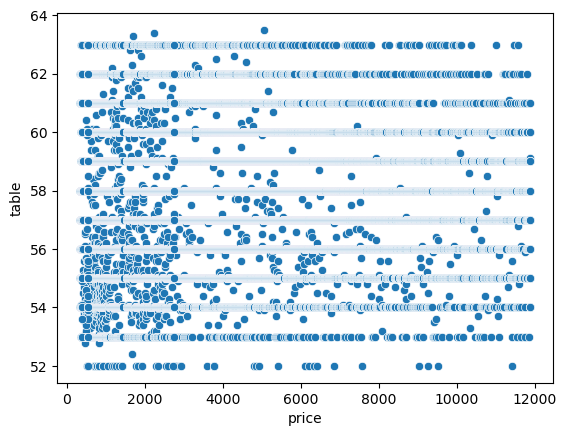

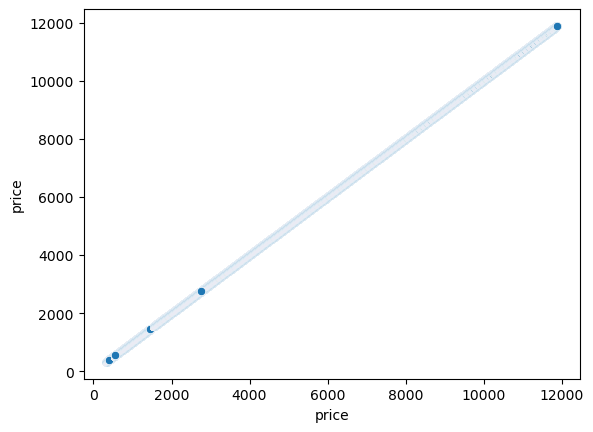

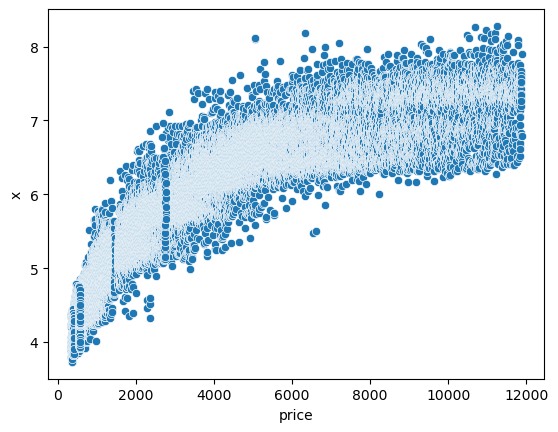

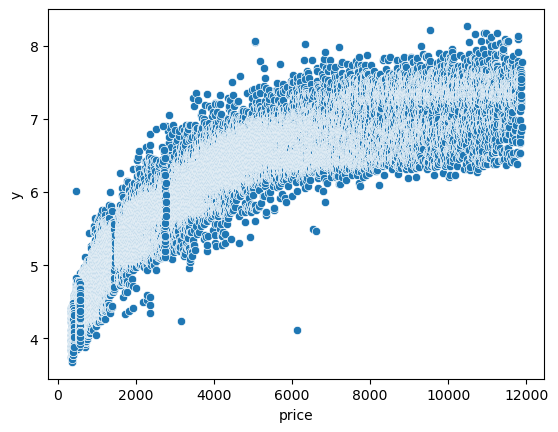

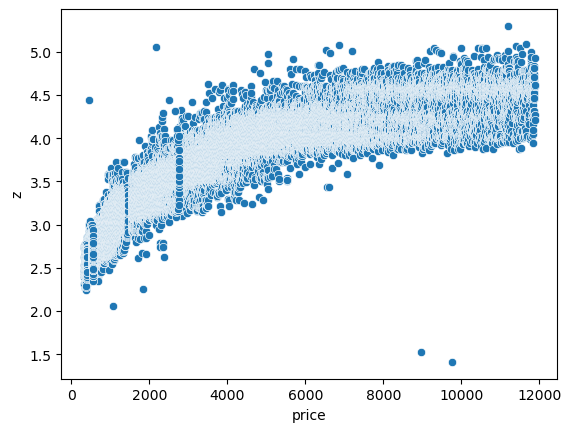

In [347]:
#scatter plot for continuos predictors and tager variables:
for col in df.select_dtypes(include='number'):
    sns.scatterplot(x=df['price'],y=df[col], palette='#00FF00')
    plt.show()

In [348]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable

df_corr['price'][abs(df_corr['price']) > 0.5 ] 

carat    0.922932
price    1.000000
x        0.899821
y        0.900957
z        0.896542
Name: price, dtype: float64

'carat', 'x','y','z' have very high positive correlation with target varivale.Therefore, they can used while building the model.

In [349]:
df_corr['price'][abs(df_corr['price']) < -0.5 ] 

Series([], Name: price, dtype: float64)

There no predictor which have negative correlation less than -0.5

#### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

#### BoxPlot

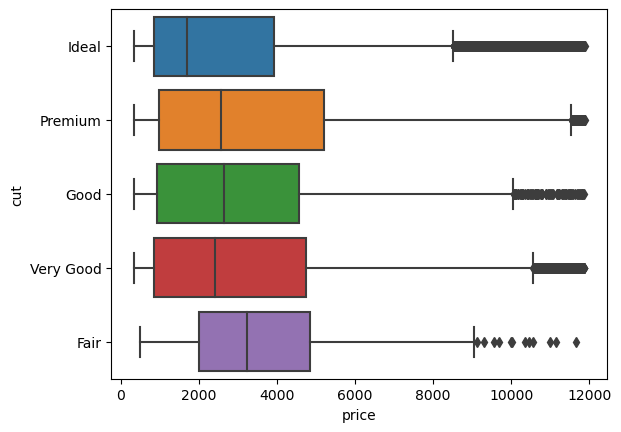

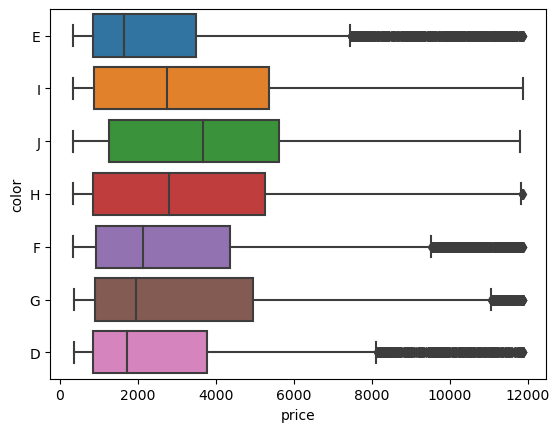

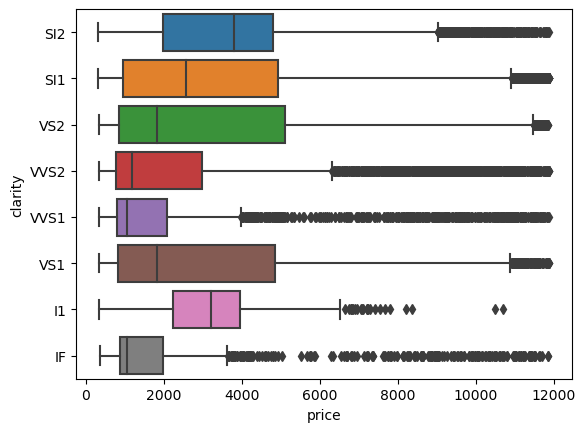

In [350]:
#Box plot for continuos predictors and tager variables:
for col in df.select_dtypes(include='object'):
    sns.boxplot(x=df['price'],y=df[col])
    plt.show()

### Interpretation
These plots gives an idea about the data distribution of continuous predictor in the X-axis for each of the category in the Y-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with price.


### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

### Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [351]:
Selected=['carat', 'x','y','z','cut', 'color', 'clarity']

# Selecting final columns
df_Selected=df[Selected]
df_Selected

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
3,0.29,4.20,4.23,2.63,Premium,I,VS2
4,0.31,4.34,4.35,2.75,Good,J,SI2
5,0.24,3.94,3.96,2.48,Very Good,J,VVS2
...,...,...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,Ideal,D,SI1
53936,0.72,5.69,5.75,3.61,Good,D,SI1
53937,0.70,5.66,5.68,3.56,Very Good,D,SI1
53938,0.86,6.15,6.12,3.74,Premium,H,SI2


# Data Preprocessing


 #### Data preprocessing involves:
Imputation of missing values

Imputation of duplicate values

Imputation of outliers

Transformation of skewed data

Scaling the numerical columns

Encoding the categorical columns

### Segrigating Numerical and categorical columns 

In [352]:
#Segregating Numerical and categorical columns

#segregating the categorical columns
categorical_cols=df_Selected.select_dtypes(include=['object', 'category'])
print("categorical columns are :")
print(categorical_cols.columns)

#segregating the numerical columns
numerical_cols=df_Selected.select_dtypes(include='number')
print("Numerical columns are :")
print(numerical_cols.columns)

categorical columns are :
Index(['cut', 'color', 'clarity'], dtype='object')
Numerical columns are :
Index(['carat', 'x', 'y', 'z'], dtype='object')


In [393]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Load the dataset
# data = pd.read_csv("your_dataset.csv")  # Replace "your_dataset.csv" with your actual dataset file

# Select numerical columns for VIF calculation
numerical_columns = df.select_dtypes(include='number').columns

# Ensure numerical columns are correctly selected
print("Numerical columns:", numerical_columns)

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()

# Calculate VIF for each numerical column
vif_data["Feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(df[numerical_columns].values, i) for i in range(len(numerical_columns))]

# Display the VIF results
# print(vif_data)


Numerical columns: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


In [394]:
vif_data

,Feature,VIF
0,carat,237.271122
1,depth,1357.430724
2,table,817.458829
3,price,16.304667
4,x,13094.973688
5,y,12144.922424
6,z,5073.492296


In [390]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical columns for VIF calculation
print(numerical_cols.columns)

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()

# Calculate VIF for each numerical column
vif_data["Feature"] = numerical_cols.columns
vif_values = []
for i in range(len(numerical_cols.columns)):
    vif = variance_inflation_factor(numerical_cols.values, i)
    vif_values.append(vif)
    print(f"VIF for column {numerical_cols[i]}: {vif}")

print("VIF values:", vif_values)

# Display the VIF results
print(vif_data)


Index(['carat', 'x', 'y', 'z'], dtype='object')


KeyError: 0

In [371]:
df_Selected['clarity'].nunique()

8

In [370]:
df_Selected['color'].nunique()

7

In [369]:
df_Selected['cut'].nunique()

5

### Scaling the Numerical Columns 

### Min-Max Scaling (Normalization):

1.Min-Max scaling transforms the data to a specific range, typically    between 0 and 1.

2.It subtracts the minimum value and divides by the difference between the maximum and minimum values.

3.The resulting distribution has a minimum value of 0 and a maximum value of 1.

4.Min-Max scaling retains the original shape of the distribution and 
preserves the relationships between the data points.

5.It is useful when the distribution of the data is not necessarily Gaussian or when there are outliers that need to be accommodated within a specific range.

In [416]:
# # Load the dataset
# data = pd.read_csv("your_dataset.csv")  # Replace "your_dataset.csv" with your actual dataset file

# Select numerical columns for VIF calculation
num_col=numerical_cols.columns 
# Ensure numerical columns are correctly selected
print("Numerical columns:", num_col)

# Create a DataFrame to store the VIF results
vif_data1= pd.DataFrame()

Numerical columns: Index(['carat', 'x', 'y', 'z'], dtype='object')


In [418]:
# Calculate VIF for each numerical column
vif_data1["Feature1"] = num_col

In [420]:
vif_data1["VIF"] = [variance_inflation_factor(df[num_col].values, i) for i in range(len(num_col))]

# Display the VIF results
# print(vif_data)

In [421]:
vif_data1

,Feature1,VIF
0,carat,10.890590
1,x,12199.497113
2,y,11902.107662
3,z,2602.169099


In [361]:
#segregating the numerical columns
numerical_cols=df_Selected.select_dtypes(include='number')
print("Numerical columns are :")
print(numerical_cols.columns)

#Min max scaling of Numerical columns
min_max = MinMaxScaler()
df_num= numerical_cols
df_scaled = min_max.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled, columns= min_max.get_feature_names_out())
df_scaled

Numerical columns are :
Index(['carat', 'x', 'y', 'z'], dtype='object')


,carat,x,y,z
0,0.016667,0.048352,0.065359,0.262211
1,0.005556,0.035165,0.034858,0.231362
2,0.050000,0.103297,0.119826,0.313625
3,0.061111,0.134066,0.145969,0.344473
4,0.022222,0.046154,0.061002,0.275064
...,...,...,...,...
47407,0.288889,0.443956,0.453159,0.537275
47408,0.288889,0.430769,0.450980,0.565553
47409,0.277778,0.424176,0.435730,0.552699
47410,0.366667,0.531868,0.531590,0.598972


# Encoding Categorical columns

In [365]:
df_Selected.head(3)

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
3,0.29,4.20,4.23,2.63,Premium,I,VS2


### One Hot Encoding of Categorical Columns

In [398]:
df_numerical.columns

NameError: name 'df_numerical' is not defined

In [397]:
ohe = OneHotEncoder(drop='first')
ohe.fit_transform(categorical_cols).toarray()

#assigning a dataframe to encoded features
df_ohe=pd.DataFrame(ohe.fit_transform(categorical_cols).toarray(),columns=ohe.get_feature_names_out())


#checking the shape of two dataFrames
print(f'Shape of Encoded Categorical Dataframe is : {df_ohe.shape}')
print(f'Shape of Numerical Dataframe is : {df_scaled.shape}')

#concatinating the encoded categorical and numerical columns into a new dataframe
df_concat=pd.concat([df_ohe,df_scaled],axis=1)
print(f'shape of concatinated datset: {df_concat.shape}')

Shape of Encoded Categorical Dataframe is : (47412, 17)
Shape of Numerical Dataframe is : (47412, 4)
shape of concatinated datset: (47412, 21)


In [372]:
df_concat.head(2)

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,x,y,z
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.016667,0.048352,0.065359,0.262211
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.005556,0.035165,0.034858,0.231362


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for the features
X_train = pd.DataFrame(X_train)  # Replace X_train with your actual training dataset

# Add a constant column to the features
X_train_with_constant = sm.add_constant(X_train)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_train_with_constant.columns
vif["VIF"] = [variance_inflation_factor(X_train_with_constant.values, i) for i in range(X_train_with_constant.shape[1])]

# Create a new DataFrame with the VIF values
vif_df = pd.DataFrame({"Feature": vif["Feature"], "VIF": vif["VIF"]})


# Predictive Modeling

In [395]:
# #printing scorer keys
# from sklearn import metrics
# scorer_keys = metrics.SCORERS.keys()
# for key in scorer_keys:
#     print(key)

# Model- 1 : Linear Regression 

### Baseline Model 

Baseline Model contains all features.

### Selecting Dependent and Independent variable

In [379]:
X = df_concat
y  = df['price']

### Splitting the dataset into Training and test Dataset 

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [381]:
print('Shape of X_train_selected :',X_train.shape)
print('Shape of y_train_selected :',y_train.shape)
print('Shape of X_test_selected :',X_test.shape)
print('Shape of y_test_selected :',y_test.shape)
print('Number of Features are :',len(X_train.columns))

Shape of X_train_selected : (33188, 21)
Shape of y_train_selected : (33188,)
Shape of X_test_selected : (14224, 21)
Shape of y_test_selected : (14224,)
Number of Features are : 21


## Calculating Vif

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Select numerical columns for VIF calculation
numerical_columns = data.select_dtypes(include=np.number).columns

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()

# Calculate VIF for each numerical column
vif_data["Feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(data[numerical_columns].values, i) for i in range(len(numerical_columns))]

# Display the VIF results
print(vif_data)


In [382]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for the features
X_train = pd.DataFrame(X.se)  # Replace X_train with your actual training dataset

# Add a constant column to the features
X_train_with_constant = sm.add_constant(X_train)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_train_with_constant.columns
vif["VIF"] = [variance_inflation_factor(X_train_with_constant.values, i) for i in range(X_train_with_constant.shape[1])]

# Create a new DataFrame with the VIF values
vif_df = pd.DataFrame({"Feature": vif["Feature"], "VIF": vif["VIF"]})



In [383]:
# Display the new DataFrame
vif_df


,Feature,VIF
0,const,538.421314
1,cut_Good,12.296399
2,cut_Ideal,39.494615
3,cut_Premium,30.816103
4,cut_Very Good,29.072706
5,color_E,1.982079
6,color_F,1.958393
7,color_G,2.146222
8,color_H,1.892392
9,color_I,1.633671


In [385]:
#calling the model and fitting the model
lr=LinearRegression()
# Creating the model on Training Data
lr.fit(X_train,y_train)

#predicting for training set
train_pred_lr=lr.predict(X_train)

#Calculating the R-Square for training set
train_rsquare_lr=r2_score(y_train,train_pred_lr)
print(f'R-Square for Train : {train_rsquare_lr}')

# Calculating MAPE for trainingset
train_mape_lr=np.mean(abs((y_train-train_pred_lr)/y_train))*100
print('Train MAPE :', train_mape_lr)


# Predicting on test data
test_pred_lr=lr.predict(X_test)

#Calculating the R-Square for test set
test_rsquare_lr=r2_score(y_test,test_pred_lr)
print(f'R-Square for Test : {test_rsquare_lr}')

# Calculating mape
test_mape_lr=np.mean(abs((y_test-test_pred_lr)/y_test))*100
print('Test MAPE  :', test_mape_lr)

LinearRegression()
R-Square for Train : 0.9261692614664935
Train MAPE : 30.863990424882033
R-Square for Test : 0.9284393998804272
Test MAPE  : 30.544905763819102


In [205]:
# sns.regplot(x=)

### Feature Selection Using SFS(Forward Selection and Backward elemination)

In [206]:
feature_names = X.columns
# Create the linear regression model
lr = LinearRegression()

# Create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(estimator=lr, k_features='best', forward=True, verbose=2, scoring='r2')

# Perform feature selection
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Transform the training and testing data to keep only the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Train a linear regression model on the selected features
lr.fit(X_train_selected, y_train)

# Evaluate the model on the testing data
score = lr.score(X_test_selected, y_test)

# Print the selected features and the model score
print("Selected Features:", selected_feature_names)
print("Model Score:", score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished

[2023-06-17 15:24:22] Features: 1/23 -- score: 0.853252369729512[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.3s finished

[2023-06-17 15:24:22] Features: 2/23 -- score: 0.8726561914340077[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.3s finished

[2023-06-17 15:24:22] Features: 3/23 -- score: 0.8827812260484565[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

Selected Features: ['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'carat', 'table', 'x', 'y', 'z']
Model Score: 0.9256243031978246


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2023-06-17 15:24:31] Features: 22/23 -- score: 0.9273682442788409[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-06-17 15:24:31] Features: 23/23 -- score: 0.927286229970852

In [207]:
#easrlier I had 23 features and after sfs I am left with 21 features
print("Number Selected Features before sfs:",len(X.columns))
print("Number Selected Features after sfs:", len(selected_feature_names))

Number Selected Features before sfs: 23
Number Selected Features after sfs: 22


In [208]:
X.columns

Index(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'carat', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

## Feature Selection Using RFE

In [209]:
# Create a Linear Regression model
lr = LinearRegression()

rfe_lr = RFE(estimator=lr, n_features_to_select=None)
# Perform RFE feature selection
X_selected_lr = rfe_lr.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices_lr = rfe_lr.get_support(indices=True)

# Print the selected feature indices and names
selected_feature_names_lr = X_train.columns[selected_feature_indices_lr]
print("Selected Feature Indices:", selected_feature_indices_lr)
print("Selected Feature Names:", selected_feature_names_lr)
print("Number Selected Features before Rfe:",len(X_train.columns))
print("Number Selected Features after Rfe:", len(selected_feature_names_lr))

Selected Feature Indices: [10 11 12 13 14 15 16 17 20 21 22]
Selected Feature Names: Index(['clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'carat', 'x', 'y', 'z'],
      dtype='object')
Number Selected Features before Rfe: 23
Number Selected Features after Rfe: 11


# Model After Feature Selection

### Features and Target variable 

In [210]:
X_train_selected=X[selected_feature_names_lr]
y_test_selected=df['price']

In [211]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_train_selected, y_test_selected, test_size=0.3, random_state=2)
print('Shape of X_train_selected :',X_train_selected.shape)
print('Shape of y_train_selected :',y_train_selected.shape)
print('Shape of X_test_selected :',X_test_selected.shape)
print('Shape of y_test_selected :',y_test_selected.shape)
print('Number of Features are :',len(X_train_selected.columns))

Shape of X_train_selected : (33266, 11)
Shape of y_train_selected : (33266,)
Shape of X_test_selected : (14258, 11)
Shape of y_test_selected : (14258,)
Number of Features are : 11


In [212]:
#calling the model and fitting the model
lr_selected=LinearRegression()
lr_selected.fit(X_train_selected,y_train_selected)

#predicting for training set
train_pred_lr_selected=lr_selected.predict(X_train_selected)

#Calculating the R-Square for training set
train_rsquare_lr_selected=r2_score(y_train_selected,train_pred_lr_selected)
print(f'R-Square for Train : {train_rsquare_lr_selected}')

# Calculating MAPE for trainingset
train_mape_lr_selected=np.mean(abs((y_train_selected-train_pred_lr_selected)/y_train))*100
print('Train MAPE :', train_mape_lr_selected)

# Predicting on test data
test_pred_lr_selected=lr_selected.predict(X_test_selected)

#Calculating the R-Square for test set
test_rsquare_lr_selected=r2_score(y_test_selected,test_pred_lr_selected)
print(f'R-Square for Test : {test_rsquare_lr_selected}')

# Calculating mape
test_mape_lr_selected=np.mean(abs((y_test_selected-test_pred_lr_selected)/y_test))*100
print('Test MAPE  :', test_mape_lr_selected)

R-Square for Train : 0.9029944229074712
Train MAPE : 28.159761304550813
R-Square for Test : 0.9013142792497735
Test MAPE  : 27.67005885555155


# Model- 2 : Knn

### baseline Model 

# Choosing best value of k

Shape of X_train_selected : (33266, 23)
Shape of y_train_selected : (33266,)
Shape of X_test_selected : (14258, 23)
Shape of y_test_selected : (14258,)
Number of Features are : 23


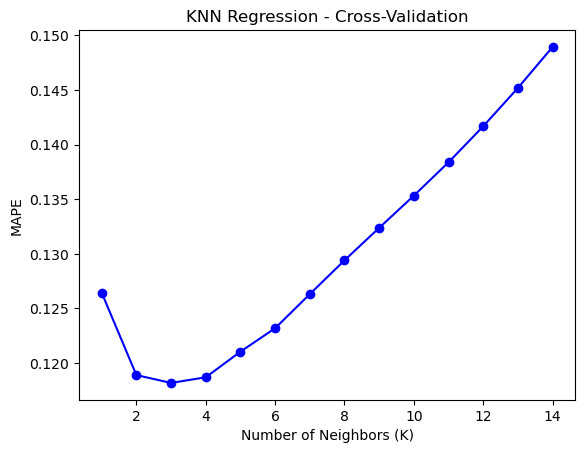

In [242]:
X = df_concat
y  = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Shape of X_train_selected :',X_train.shape)
print('Shape of y_train_selected :',y_train.shape)
print('Shape of X_test_selected :',X_test.shape)
print('Shape of y_test_selected :',y_test.shape)
print('Number of Features are :',len(X_train.columns))

# Define a range of K values to try
k_values = range(1, 15)

# Initialize lists to store mean squared errors
mape_scores = []

# Perform cross-validation for each value of K
for k in k_values:
    # Create a KNN Regressor object
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Perform cross-validation with 5 folds
    scores = -cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
    
    # Calculate the mean squared error
    mape = np.mean(scores)
    
    # Append Mape to the list
    mape_scores.append(mape)

# Plot the Mape scores against K values
plt.plot(k_values, mape_scores, 'bo-')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('MAPE')
plt.title('KNN Regression - Cross-Validation')
plt.show()

In [213]:
X = df_concat
y  = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Shape of X_train_selected :',X_train.shape)
print('Shape of y_train_selected :',y_train.shape)
print('Shape of X_test_selected :',X_test.shape)
print('Shape of y_test_selected :',y_test.shape)
print('Number of Features are :',len(X_train.columns))
# Create and fit the KNN regression model
k =3# Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train,y_train)

# Predicting for Training Dataset
train_pred_knn=knn_model.predict(X_train)

#Calculating the R-Square for training set
train_rsquare_knn=r2_score(y_train,train_pred_knn)
print(f'Train R-Square  : {train_rsquare_knn}')

# Calculating MAPE for train
train_mape_knn=np.mean(abs((y_train-train_pred_knn)/y_train))*100
print('Train MAPE :', train_mape_knn)


#Predicting for Test Set
test_pred_knn=knn_model.predict(X_test)

#Calculating the R-Square for test set
test_rsquare_knn=r2_score(y_test,test_pred_knn)
print(f'Test R-Square   : {test_rsquare_knn}')

# Calculating for Test Dataset
test_mape_knn=np.mean(abs((y_test-test_pred_knn)/y_test))*100
print('Test MAPE :', test_mape_knn)

Shape of X_train_selected : (33266, 23)
Shape of y_train_selected : (33266,)
Shape of X_test_selected : (14258, 23)
Shape of y_test_selected : (14258,)
Number of Features are : 23
Train R-Square  : 0.9806582804206861
Train MAPE : 7.598721180467756
Test R-Square   : 0.9573649510830454
Test MAPE : 11.157930551630711


# Model-3 : Decision Tree 

### Base Line Model 

In [214]:
dtr_model=DecisionTreeRegressor()
dtr_model.fit(X_train,y_train)

#Predicting for Training set
train_pred_dt=dtr_model.predict(X_train)

#Calculating the R-Square for train set
train_rsquare_dt=r2_score(y_train,train_pred_dt)
print(f'Train R-Square  : {train_rsquare_dt}')


# Calculating mape for Training set
train_mape_dt=np.mean(abs((y_train-train_pred_dt)/y_train))*100
print('Train MAPE :', train_mape_dt)

#Predicting for test set
test_pred_dt=dtr_model.predict(X_test)

#Calculating the R-Square for test set
test_rsquare_dt=r2_score(y_test,test_pred_dt)
print(f'Test R-Square  : {test_rsquare_dt}')


# Calculating MAPE for Test set
test_mape_dt=np.mean(abs((y_test-test_pred_dt)/y_test))*100
print('Test MAPE  :', test_mape_dt)


Train R-Square  : 0.9999945919891687
Train MAPE : 0.01520205098398227
Test R-Square  : 0.9610203246557545
Test MAPE  : 8.504466326127995


### Feature selection using RFE

In [215]:
# Create a Dt regressor
dt =DecisionTreeRegressor()

rfe_dt = RFE(estimator=dt, n_features_to_select=None)
# Perform RFE feature selection
X_selected_dt = rfe_dt.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices_dt = rfe_dt.get_support(indices=True)

# Print the selected feature indices and names
selected_feature_names_dt = X_train.columns[selected_feature_indices_dt]
print("Selected Feature Indices:", selected_feature_indices_dt)
print("Selected Feature Names:", selected_feature_names_dt)

Selected Feature Indices: [ 7  8  9 11 12 16 17 18 20 21 22]
Selected Feature Names: Index(['color_H', 'color_I', 'color_J', 'clarity_SI1', 'clarity_SI2',
       'clarity_VVS2', 'carat', 'depth', 'x', 'y', 'z'],
      dtype='object')


In [227]:
# X=df_concat[['color_H', 'color_I', 'color_J', 'clarity_SI1', 'clarity_SI2',
#        'clarity_VVS2', 'carat', 'depth', 'x', 'y', 'z']]
# y=df['price']
# X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_train_selected, y_test_selected, test_size=0.3, random_state=2)
# print('Shape of X_train_selected :',X_train_selected.shape)
# print('Shape of y_train_selected :',y_train_selected.shape)
# print('Shape of X_test_selected :',X_test_selected.shape)
# print('Shape of y_test_selected :',y_test_selected.shape)
# print('Number of Features are :',len(X_train_selected.columns))

# Model-4 : Random Forest

### Baseline Model

In [217]:
X = df_concat
y  = df['price']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Shape of X_train_selected :',X_train.shape)
print('Shape of y_train_selected :',y_train.shape)
print('Shape of X_test_selected :',X_test.shape)
print('Shape of y_test_selected :',y_test.shape)
print('Number of Features are :',len(X_train.columns))

Shape of X_train_selected : (33266, 23)
Shape of y_train_selected : (33266,)
Shape of X_test_selected : (14258, 23)
Shape of y_test_selected : (14258,)
Number of Features are : 23


In [219]:
# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=200, random_state=42,max_depth=None)
# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the training data
train_pred_rf = rf.predict(X_train)

#Calculating the R-Square for train set
train_rsquare_rf=r2_score(y_train,train_pred_rf)
print(f'Train R-Square  : {train_rsquare_rf}')

# Calculating mape for Training set
train_mape_rf=np.mean(abs((y_train-train_pred_rf)/y_train))*100
print('Train MAPE :', train_mape_rf)
print('Train Accuracy :', 100-train_mape_rf)

# Predict on the test data
test_pred_rf = rf.predict(X_test)

#Calculating the R-Square for test set
test_rsquare_rf=r2_score(y_test,test_pred_rf)
print(f'Test R-Square  : {test_rsquare_rf}')

# Calculating MAPE for Test set
test_mape_rf=np.mean(abs((y_test-test_pred_rf)/y_test))*100
print('Test MAPE  :', test_mape_rf)
print('Test Accuracy :', 100-test_mape_rf)


Train R-Square  : 0.9971285287559778
Train MAPE : 2.481716958221083
Train Accuracy : 97.51828304177891
Test R-Square  : 0.9778585325889821
Test MAPE  : 6.690967369410056
Test Accuracy : 93.30903263058994


### Feature selection using RFE

In [220]:
# Create a Random Forest regressor
rf = RandomForestRegressor()

rfe = RFE(estimator=rf, n_features_to_select=None)
# Perform RFE feature selection
X_selected = rfe.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Print the selected feature indices and names
selected_feature_names = X_train.columns[selected_feature_indices]
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_feature_names)

Selected Feature Indices: [ 7  8  9 11 12 16 17 18 20 21 22]
Selected Feature Names: Index(['color_H', 'color_I', 'color_J', 'clarity_SI1', 'clarity_SI2',
       'clarity_VVS2', 'carat', 'depth', 'x', 'y', 'z'],
      dtype='object')


### Random Forest Model 2

In [221]:
X_train.shape

(33266, 23)

In [222]:
# Number of trees in random forest
# n_estimators = [20,60,100,120]
n_estimators=[20,60]

# # Number of features to consider at every split
# max_features = [0.2,0.6,1.0]

# # Maximum number of levels in tree
# max_depth = [2,8,None]

# # Number of samples
# max_samples = [0.5,0.75,1.0]

# # Bootstrap samples
# bootstrap = [True,False]

# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2]

param_grid = {'n_estimators': n_estimators
#                'max_features': max_features,
#                'max_depth': max_depth,
#               'max_samples':max_samples,
#               'bootstrap':bootstrap,
#               'min_samples_split':min_samples_split,
#               'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

# Building Random Forest regressor
rf=RandomForestRegressor() 


clf = GridSearchCV(rf, param_grid, cv = 4, scoring='neg_mean_absolute_percentage_error')

clf.fit(X_train, y_train)

print('Best Parameters:',clf.best_params_)

print("Best Score:",clf.best_score_)

{'n_estimators': [20, 60]}
Best Parameters: {'n_estimators': 60}
Best Score: -0.07028284896719719


In [223]:
negative_mape = -0.1130583407046215
positive_mape = abs(negative_mape)
print("Positive MAPE:", positive_mape)

Positive MAPE: 0.1130583407046215


### Model after Hyperparametr tuning 

In [224]:
# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=60, random_state=42,max_depth=None)
# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the training data
train_pred_rf = rf.predict(X_train)

#Calculating the R-Square for train set
train_rsquare_rf=r2_score(y_train,train_pred_rf)
print(f'Train R-Square  : {train_rsquare_rf}')

# Calculating mape for Training set
train_mape_rf=np.mean(abs((y_train-train_pred_rf)/y_train))*100
print('Train MAPE :', train_mape_rf)
print('Train Accuracy :', 100-train_mape_rf)

# Predict on the test data
test_pred_rf = rf.predict(X_test)

#Calculating the R-Square for test set
test_rsquare_rf=r2_score(y_test,test_pred_rf)
print(f'Test R-Square  : {test_rsquare_rf}')

# Calculating MAPE for Test set
test_mape_rf=np.mean(abs((y_test-test_pred_rf)/y_test))*100
print('Test MAPE  :', test_mape_rf)
print('Test Accuracy :', 100-test_mape_rf)


Train R-Square  : 0.9969271491400286
Train MAPE : 2.541323410579628
Train Accuracy : 97.45867658942038
Test R-Square  : 0.9775083574034488
Test MAPE  : 6.759608508558307
Test Accuracy : 93.2403914914417


# Model Peformace

In [256]:
data = {'Model': ['Linear Reg', 'Knn','DT','Random Forest'],
        'Test MAPE': [test_mape_lr,test_mape_knn,test_mape_dt,test_mape_rf]
        }
df_performace=pd.DataFrame(data)
df_performace

,Model,Test MAPE
0,Linear Reg,30.445156
1,Knn,11.157931
2,DT,8.504466
3,Random Forest,6.759609


explained_variance
r2
max_error
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_root_mean_squared_error
neg_mean_poisson_deviance
neg_mean_gamma_deviance
accuracy
top_k_accuracy
roc_auc
roc_auc_ovr
roc_auc_ovo
roc_auc_ovr_weighted
roc_auc_ovo_weighted
balanced_accuracy
average_precision
neg_log_loss
neg_brier_score
adjusted_rand_score
rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted
